<a href="https://colab.research.google.com/github/monikanaumovskaa/Introduction-to-Data-Science/blob/master/Data%20Prep/%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 46.1MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               754 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             760 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       758 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [6]:
df.isnull().sum()

,0
Pregnancies,14
Glucose,0
BloodPressure,0
SkinThickness,8
Insulin,0
BMI,10
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
percent = df.isnull().sum()/len(df)*100
percent

,0
Pregnancies,1.822917
Glucose,0.000000
BloodPressure,0.000000
SkinThickness,1.041667
Insulin,0.000000
BMI,1.302083
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [8]:
percent = percent.reset_index().rename(columns={"index":"diagnosis", 0:"percent missing"})
percent #reset_index se koristi za dvodmenzionalna tabela(a ne Serija), mora da e index

,diagnosis,percent missing
0,Pregnancies,1.822917
1,Glucose,0.000000
2,BloodPressure,0.000000
3,SkinThickness,1.041667
4,Insulin,0.000000
5,BMI,1.302083
6,DiabetesPedigreeFunction,0.000000
7,Age,0.000000
8,Outcome,0.000000


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [9]:
#MISSINGNO LIBRARY-> .bar()/.matrix()/.heatmap()/.dendrogram()

<Axes: >

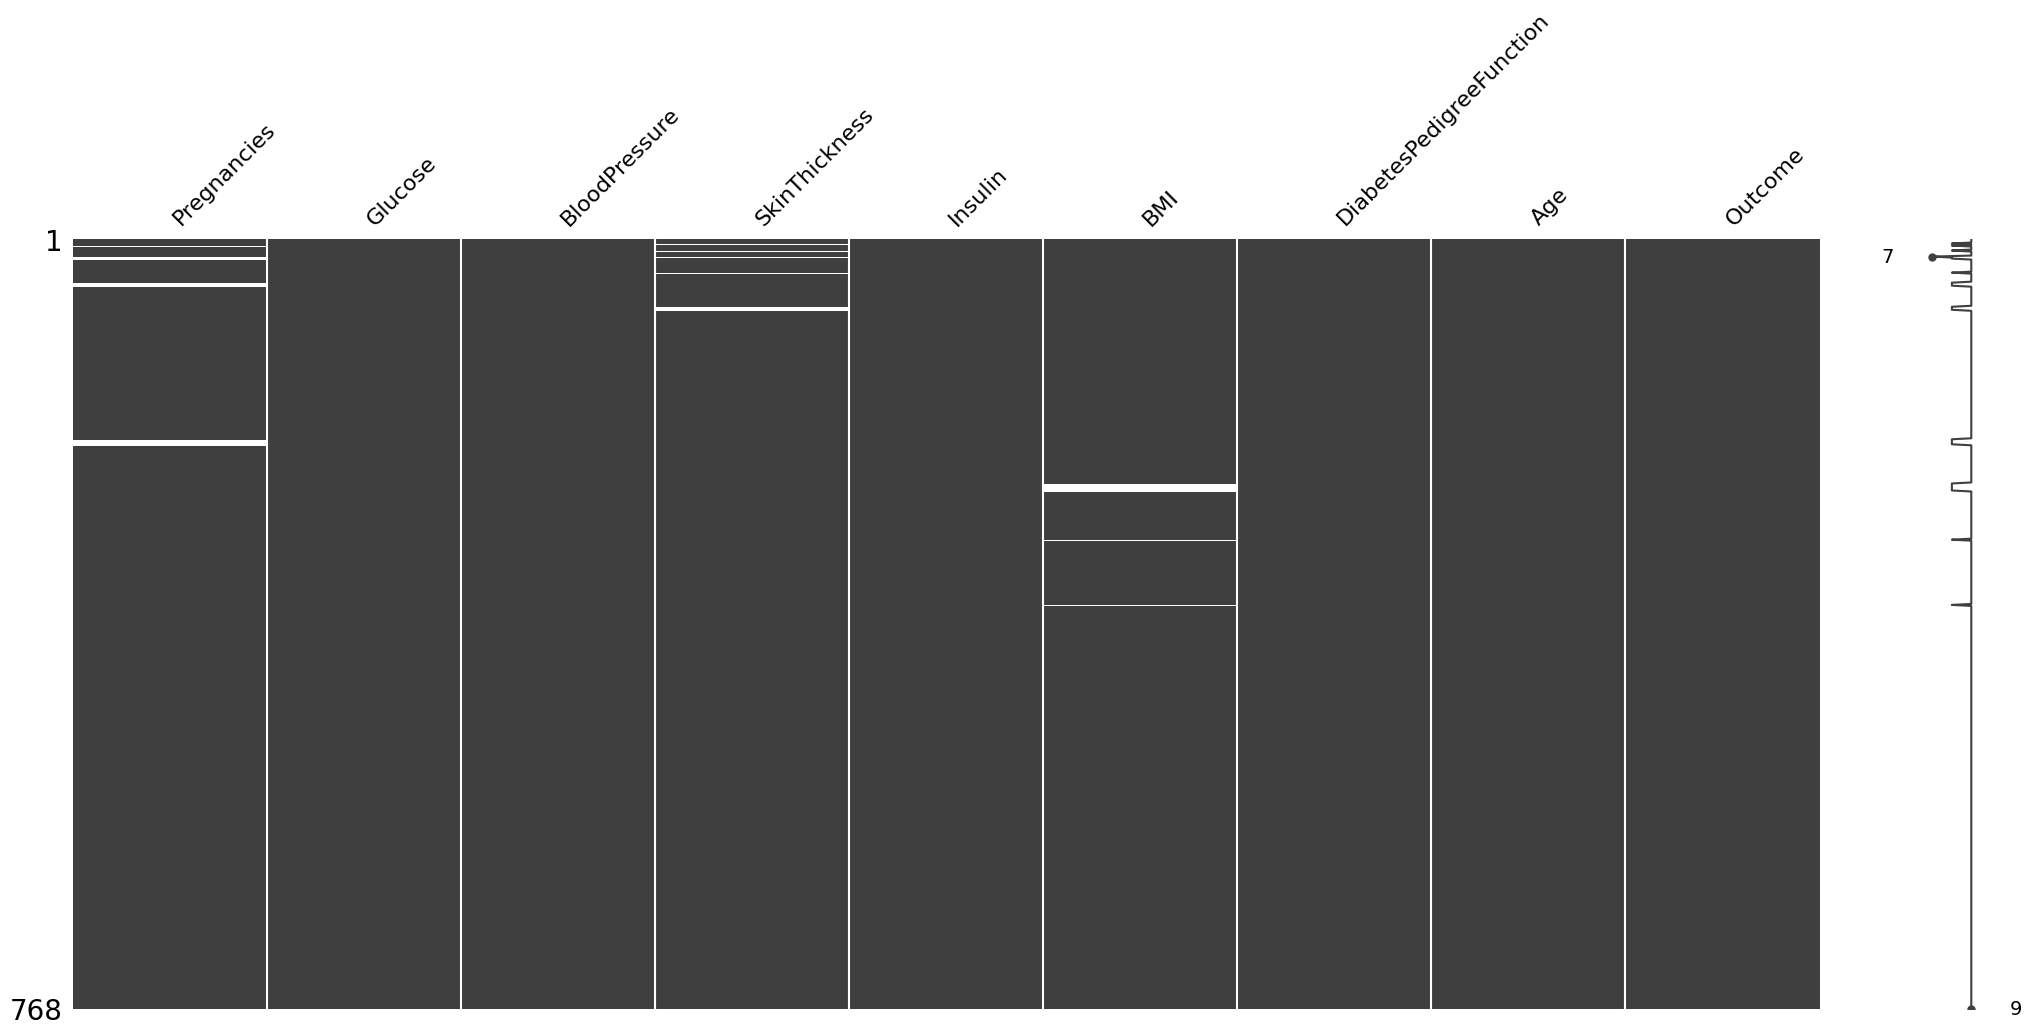

In [10]:
import missingno as msno
msno.matrix(df)

## <font color = 'Orange'>Handle the missing values</font>

In [32]:
#imputation with constant
from sklearn.impute import SimpleImputer
constant_imputer = SimpleImputer(strategy = 'constant', fill_value=0)
df['Pregnancies'] = constant_imputer.fit_transform([df['Pregnancies']])[0]
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,8
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [33]:
#IMPUTATION WITH MEAN
df.BMI = df.BMI.fillna(df.BMI.mean())

In [34]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,8
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


***KNN IMPUTATION***

In [45]:
#KNN
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

In [62]:
scaler = MinMaxScaler() #objekt na klasata, se skaliraat kolonite od 0-1
scaled_data = scaler.fit_transform(df[['SkinThickness']]) #fit_transform presmetuva najmala i najgolema vr. za sekoja kolona
knn_imputer = KNNImputer(n_neighbors=1) #bira eden nablizok sosed, imputirame vrednosti
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data

array([[0.35353535],
       [0.29292929],
       [0.        ],
       [0.23232323],
       [0.35353535],
       [0.20744285],
       [0.32323232],
       [0.        ],
       [0.45454545],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.20744285],
       [0.23232323],
       [0.19191919],
       [0.        ],
       [0.47474747],
       [0.        ],
       [0.20744285],
       [0.3030303 ],
       [0.41414141],
       [0.        ],
       [0.        ],
       [0.35353535],
       [0.33333333],
       [0.26262626],
       [0.        ],
       [0.15151515],
       [0.19191919],
       [0.        ],
       [0.26262626],
       [0.36363636],
       [0.11111111],
       [0.        ],
       [0.20744285],
       [0.33333333],
       [0.        ],
       [0.37373737],
       [0.42424242],
       [0.47474747],
       [0.25252525],
       [0.        ],
       [0.18181818],
       [0.24242424],
       [0.        ],
       [0.39393939],
       [0.        ],
       [0.272

In [64]:
imputed_data = scaler.inverse_transform(imputed_data)
imputed_data

array([[3465.        ],
       [2871.        ],
       [   0.        ],
       [2277.        ],
       [3465.        ],
       [2033.14736842],
       [3168.        ],
       [   0.        ],
       [4455.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [2033.14736842],
       [2277.        ],
       [1881.        ],
       [   0.        ],
       [4653.        ],
       [   0.        ],
       [2033.14736842],
       [2970.        ],
       [4059.        ],
       [   0.        ],
       [   0.        ],
       [3465.        ],
       [3267.        ],
       [2574.        ],
       [   0.        ],
       [1485.        ],
       [1881.        ],
       [   0.        ],
       [2574.        ],
       [3564.        ],
       [1089.        ],
       [   0.        ],
       [2033.14736842],
       [3267.        ],
       [   0.        ],
       [3663.        ],
       [4158.        ],
       [4653.        ],
       [2475.        ],
       [   0.   

In [68]:
df[['SkinThickness']] = imputed_data
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [70]:
import pandas
df.to_csv('Dataset without MissingValues')

Print the first rows of your final Dataset

In [71]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,3465.0,0,33.6,0.627,50,1


1. ne smee da ima none vrednosti
2. kategoriski podatoci ne smee

# <font color='orange'>KNN Classification</font>

In [80]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('Dataset without MissingValues')

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [83]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :-1], df['Outcome'],test_size=0.2)

In [89]:
X_train.shape #614 редици-примероци 9 columns

(614, 9)

In [98]:
Y_train.shape #614 rows

(614,)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, Y_train) #go obucuva modelot-> gi povrzuva kolonite so redovi

KNeighborsClassifier(n_neighbors=2)

In [100]:
KNeighborsClassifier()

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [105]:
prediction = classifier.predict(X_test)

In [106]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))

[[93  5]
 [43 13]]
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        98
           1       0.72      0.23      0.35        56

    accuracy                           0.69       154
   macro avg       0.70      0.59      0.57       154
weighted avg       0.70      0.69      0.63       154



Метрики:

-accuracy-> процент на точни предвидувања
- confusion matrix -> го покажува броењето на вистинските и погрешните предвидувања по класите
- precision,recall, F1-score-> метрики за проценка на моделот кога имаме нерамнотежени податоци
- classification report -> сите метрики заедно